In [32]:
import pandas as pd
import numpy as np

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터 셋을 사용
- 막대 그래프는 북한의 발전량을 표시
- 선그래프는 북한 발전량의 전년 대비 증감률을 백분율로 나타낸다.

In [33]:
df = pd.read_excel("../Data/남북한발전전력량.xlsx")
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [34]:
# 북한 전력량만 선택
df = df.iloc[5:]

# 전력량 컬럼 삭제
df.drop('전력량 (억㎾h)' , axis=1 , inplace=True)
df

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [35]:
# index를 발전 전력별로 변경
df.set_index('발전 전력별' , inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [36]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [37]:
# 합계 컬럼을 총 발전량으로 변경
df = df.rename(columns={'합계':'총발전량'})
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [43]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [44]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> 증감율 (변동율) 계산

In [38]:
# 증감율 (변동율) 계산
# 총발전량 -1년 이라는 컬럼 생성 ; 전 해의 데이터 가져오기
df['총발전량-1년'] = df['총발전량'].shift(1) # 1행 전 데이터 가져오기
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [49]:
# 증감율 컬럼 생성
df['증감율'] = ((df['총발전량'] / df['총발전량-1년']) - 1) * 100 # -1 : 감소값 알려고 ..?
df['증감율2'] = df['총발전량'].pct_change() * 100
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감율,증감율2
1990,277,156,121,-,NaN,NaN,NaN
1991,263,150,113,-,277,-5.054152,-5.054152
1992,247,142,105,-,263,-6.08365,-6.083650
1993,221,133,88,-,247,-10.526316,-10.526316
1994,231,138,93,-,221,4.524887,4.524887


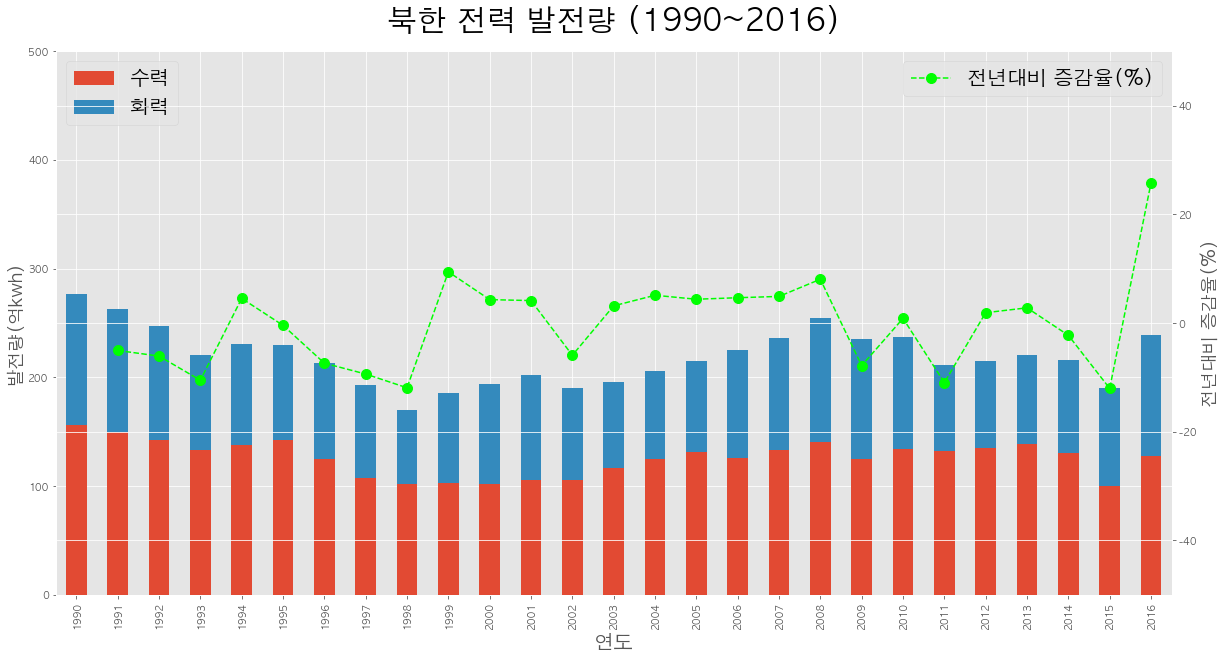

In [72]:
# 2축 그래프 그리기
plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(kind = 'bar', figsize = (20,10) , stacked = True) # stacked T : 쌓아그리기
ax2 = ax1.twinx() # x축이 쌍둥이 값이다 
ax2.plot(df.index , df.증감율 , ls = '--', marker = 'o', markersize = 10, color = 'lime' , label = '전년대비 증감율(%)') # ls : -- 점선

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50) #증감율 %

ax1.set_xlabel('연도' , size = 20)
ax1.set_ylabel('발전량(억kwh)', size=18)
ax2.set_ylabel('전년대비 증감율(%)' , size=18)

plt.title('북한 전력 발전량 (1990~2016)', size = 30 ,pad=20)
ax1.legend(loc='upper left', fontsize = 20)
ax2.legend(loc='upper right' , fontsize = 20)
plt.show()

---